In [1]:
%pylab inline
import scipy.integrate as integrate

Populating the interactive namespace from numpy and matplotlib


N data points of single quantity. ($x_i, \sigma_i$), $i=1,...,N$
The errors are Gaussian. 

What is the distribution of $x_0, \sigma_0$

$P(model | data) = C P_{pr}(model)P(data|model)$

$model = (x_0, \sigma_0)$

### What is the prior and the likelihood?

Location variables (x_0) we can have constant variables, but for variables
the prior would be $1/\sigma_0$

$P_{pr}(x_0, \sigma_0) = \frac{C}{\sigma_0}$

### likelihood:

Let's say the data is independent (which i snot the case if you measure with the same insturment)

$P(data|x_0, \sigma_0) = \prod_{i=1}^N P(data|x_0, \sigma_0) $

In the $lim \sigma_0->0$

$P(data_i|x,\sigma_i=0) = \dfrac{1}{\sqrt{2\pi \sigma_i^2}}e^{-(x_i-x)^2/2\sigma_i^2}$

$\sigma_i \neq 0$

$P(data_i|x_0,\sigma_0) = \int \dfrac{dx}{\sqrt{2\pi \sigma_i^2}}e^{-(x_i-x)^2/2\sigma_i^2} \dfrac{1}{\sqrt{2\pi \sigma_0^2}}e^{-(x-x_0)^2/2\sigma_0^2}$



$P(data|x,\sigma_0) = \dfrac{C}{\sigma_0^{N+1}} \prod \dfrac{1}{\sigma_i} \int e^{-(x_i-x)^2/2\sigma_i^2-(x-x_0)^2/2\sigma_0^2} dx $

plot $\sigma_0 vs x_0$

### Example:

10 data points:

$x_0 =10.0$

$\sigma_0 = 1.0$

$\sigma_i = 0.1$




In [17]:
sigma_i = 0.1
sigma_0 = 1.0
x_0 = 10.
N_points = 10.0
data = np.random.normal(x_0, sigma_0, N_points)


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:5: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


In [50]:
def likelihood(x, x_i, x_0, sigma_i, sigma_0):
    l = -((x_i-x)**2.0/(2.*sigma_i**2.0)) - ((x-x_0)**2.0/(2.*sigma_0**2.0))
    return l

In [52]:
likelihood(10.0, data[0], x_0, sigma_i, sigma_0)


-26.0666161702365

In [71]:
def total_likelihood(data, x_0, sigma_i, sigma_0):
    x_i = data
    I = np.zeros(N_points)
    for i in range(len(data)):
        I[i] = integrate.quad(likelihood, -16*sigma_0, 16*sigma_0, args=(x_i[i], x_0, sigma_i, sigma_0))[0] -log10(sigma_i)
    return sum(I)

In [72]:
total_likelihood(data, x_0, sigma_i, sigma_0)

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:3: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  app.launch_new_instance()


-2978353.5110311517

In [73]:
Sigma_0 = np.linspace(0.5, 1.5, 100)
X_0 = np.linspace(5, 15, 100)
P = np.zeros((len(Sigma_0), len(X_0)))
for i in range(len(Sigma_0)):
    for j in range(len(X_0)):
        P[i][j] = total_likelihood(data, X_0[j], sigma_i, Sigma_0[i])/Sigma_0[i]**(N_points+1)


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:3: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  app.launch_new_instance()


In [59]:
print P

[[ -2.00124776e+09  -2.00191642e+09  -2.00259846e+09 ...,  -2.12837462e+09
   -2.13034050e+09  -2.13231976e+09]
 [ -1.64962552e+09  -1.65015151e+09  -1.65068802e+09 ...,  -1.74962626e+09
   -1.75117266e+09  -1.75272959e+09]
 [ -1.36528184e+09  -1.36569755e+09  -1.36612156e+09 ...,  -1.44431566e+09
   -1.44553784e+09  -1.44676832e+09]
 ..., 
 [ -9.11300401e+04  -9.11315206e+04  -9.11330308e+04 ...,  -9.14115205e+04
   -9.14158733e+04  -9.14202557e+04]
 [ -8.58962824e+04  -8.58976469e+04  -8.58990386e+04 ...,  -8.61556976e+04
   -8.61597092e+04  -8.61637481e+04]
 [ -8.09988403e+04  -8.10000985e+04  -8.10013819e+04 ...,  -8.12380519e+04
   -8.12417511e+04  -8.12454754e+04]]


<matplotlib.colorbar.Colorbar instance at 0x7f9c1aa4de60>

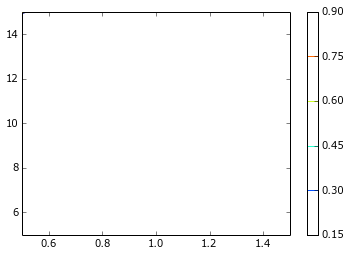

In [74]:
contour(Sigma_0, X_0, np.exp(P-np.max(P)))
colorbar()

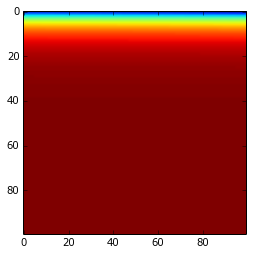

In [70]:
imshow(P)

# Outliers



Never remove data that is far in the wings of your distribution.

N data points, $x_i$, $\sigma_i$

My model is going to be a Gaussian distribution $x_m, \sigma_m$

outlier distribution $x_{out}, \sigma_{out}$ (Make the assumption that this distribution is a Gaussian)

$q_i$ binary flag: $1=model, 0=outlier$
    
$P_b:$ Add a likelihood of a point being bad. What is the length of the information with what you start and what are the amount of
    information that you end up with. This mode give you N+5 parameters (2model, 2outlier, N(q), P_b)

$P(model|data) = CP_{pr}(model)P(data|model)$

$P(data|model) = \prod P(data_i|model)$

$ P(data_i|model)$ if $q=1$ $ = \int \dfrac{dx}{\sqrt{2\pi \sigma_i^2}}e^{-(x_i-x)^2/2\sigma_i^2} \dfrac{1}{\sqrt{2\pi \sigma_m^2}}e^{-(x-x_m)^2/2\sigma_m^2}$

if $q=0$

$= \int \dfrac{dx}{\sqrt{2\pi \sigma_i^2}}e^{-(x_i-x)^2/2\sigma_i^2} \dfrac{1}{\sqrt{2\pi \sigma_{out}^2}}e^{-(x-x_{out})^2/2\sigma_{out}^2}$



$P(data|model) = \left[\int \dfrac{dx}{\sqrt{2\pi \sigma_i^2}}e^{-(x_i-x)^2/2\sigma_i^2} \dfrac{1}{\sqrt{2\pi \sigma_m^2}}e^{-(x-x_m)^2/2\sigma_m^2}  \right]^{q_i} \left[\int \dfrac{dx}{\sqrt{2\pi \sigma_i^2}}e^{-(x_i-x)^2/2\sigma_i^2} \dfrac{1}{\sqrt{2\pi \sigma_{out}^2}}e^{-(x-x_{out})^2/2\sigma_{out}^2}\right]^{1-q_i}$

### Prior:

$P_{pr}(model) = \dfrac{C}{\sigma_m \sigma_{out}}P(q_i)$

$P(q_i)= \prod (1-P_b)^q_i P_b^{1-q_i}$

### what parameter do we care?

$P(x_m, \sigma_m, x_{out}, \sigma_{out}, P_b|data) = \frac{C}{\sigma_m \sigma_{out}}\sum_{q_1=0,1} P(q_i)P(data|model) = \frac{C}{\sigma_m \sigma_{out}} \prod_{1=1}^N \left( (1-P_b)/2\pi \sigma_i A + P_b/2\pi \sigma_i B \right)  $